In [76]:
# importar la librería Requests que sirve para enviar consultas HTTP
import requests 
  
# api-endpoint 
endpoint = "https://api.openaq.org/v1/locations"
parameters = "?country=CL&include_fields"
URL = endpoint+parameters

r = requests.get(url = URL) 
  
# extracting data in json format 
data = r.json() 
  
#print(data)

In [2]:
import pandas as pd

valdivia_df = pd.DataFrame(data['results'])
valdivia_df = valdivia_df.sort_values("count", ascending=False)
valdivia_df[0:30]

,city,coordinates,count,country,firstUpdated,lastUpdated,location,parameters,sourceName,sourceNames
61,La Florida,"{'latitude': -33.516632, 'longitude': -70.58813}",238464,CL,2015-09-23T12:00:00.000Z,2018-10-31T14:00:00.000Z,La Florida,"[no2, so2, co, pm25, o3, pm10]",Chile - SINCA,[Chile - SINCA]
44,Escuela E-10,"{'latitude': -22.085518, 'longitude': -70.18868}",140117,CL,2015-09-23T16:00:00.000Z,2018-10-31T16:00:00.000Z,Escuela E-10,"[so2, pm10, o3, pm25, co, no2]",Chile - SINCA,[Chile - SINCA]
89,Puente Alto,"{'latitude': -33.591393, 'longitude': -70.59479}",132720,CL,2015-09-23T13:00:00.000Z,2018-10-31T14:00:00.000Z,Puente Alto,"[so2, pm10, no2, pm25, co, o3]",Chile - SINCA,[Chile - SINCA]
42,El Bosque,"{'latitude': -33.5471, 'longitude': -70.66621}",124023,CL,2015-09-23T13:00:00.000Z,2018-10-31T14:00:00.000Z,El Bosque,"[co, no2, o3, pm10, so2, pm25]",Chile - SINCA,[Chile - SINCA]
36,Coyhaique II,"{'latitude': -45.579044, 'longitude': -72.049965}",120918,CL,2015-09-23T12:00:00.000Z,2018-10-31T14:00:00.000Z,Coyhaique II,"[co, pm25, no2, o3, pm10, so2]",Chile - SINCA,[Chile - SINCA]
19,Cerro Navia,"{'latitude': -33.43309, 'longitude': -70.73215}",113959,CL,2015-09-23T13:00:00.000Z,2018-10-31T14:00:00.000Z,Cerro Navia,"[co, no2, o3, pm10, pm25]",Chile - SINCA,[Chile - SINCA]
88,Pudahuel,"{'latitude': -33.437813, 'longitude': -70.75017}",111952,CL,2015-09-23T13:00:00.000Z,2018-10-31T14:00:00.000Z,Pudahuel,"[no2, so2, co, pm25, pm10, o3]",Chile - SINCA,[Chile - SINCA]
74,Puchuncaví,"{'latitude': -32.764137, 'longitude': -71.45449}",107160,CL,2015-09-23T12:00:00.000Z,2018-10-31T13:00:00.000Z,Los Maitenes,"[no2, co, pm10, o3, so2]",Chile - SINCA,[Chile - SINCA]
82,Nueva Libertad,"{'latitude': -36.735996, 'longitude': -73.11869}",106904,CL,2015-09-23T14:00:00.000Z,2018-10-31T15:00:00.000Z,Nueva Libertad,"[pm25, co, pm10, no2, so2]",Chile - SINCA,[Chile - SINCA]
85,Santiago,"{'latitude': -33.46414, 'longitude': -70.6608}",106886,CL,2015-09-23T13:00:00.000Z,2018-10-31T14:00:00.000Z,Parque O'Higgins,"[so2, pm25, pm10, co, o3, no2]",Chile - SINCA,[Chile - SINCA]


<BarContainer object of 100 artists>

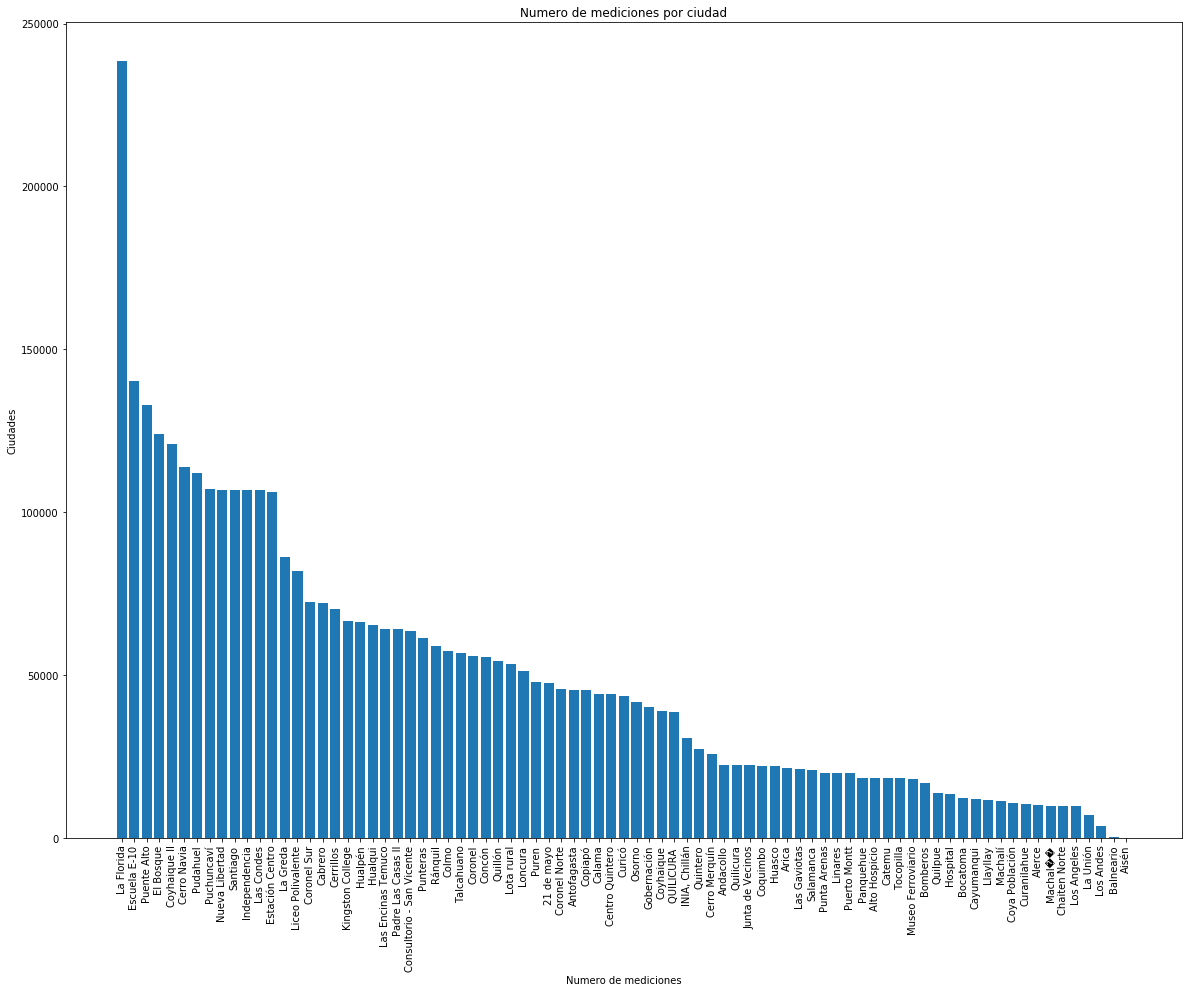

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
x = valdivia_df["city"]
y = valdivia_df["count"]

lons = []
lats = []
for i in valdivia_df["coordinates"]:
    lons.append(i["longitude"])
    lats.append(i["latitude"])

plt.xlabel("Numero de mediciones")
plt.ylabel("Ciudades")
plt.title("Numero de mediciones por ciudad")
plt.xticks(rotation=90)


#plt.hist(y, bins=30)

plt.bar(x,y)

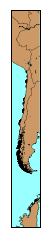

In [72]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np


m = Basemap(width=1200000,height=9000000,projection='lcc',
            resolution='f',lat_0=(max(lats)+min(lats))/2,lon_0=(max(lons)+min(lons))/2, fix_aspect=10000)
m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.25)
x, y = m(lons,lats)
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.scatter(x,y,10,marker='o',color='k')

plt.show()

3. Trabajo práctico 1
En el marco de un proyecto "Smart City Valdivia", se desea almacenar mediciones de particulas en el aire en Valdivia a partir de la API OpenAQ. Estos datos se cruzaron a posteriori con datos meteorologicos de Valdivia (por ejemplo desde la API https://openweathermap.org/api). Diseñar un modelo Entidad-Asociación que permita almacenar esta información y extenderla a otras ciudades del sur de Chile.

Proponer un modelo de documentos JSON para almacenar está información en Mongo.

Conectarse a la API OpenAQ para empezar a llenar su base de datos Mongo.

![Diagrama](https://i.imgur.com/CvAhLeh.png)

Medicion : {  
    parametro: **String**,  
    unidad: **String**,  
    valor: **Number**  
    ubicacion: {  
    &nbsp;&nbsp;&nbsp;&nbsp;latitud: **Number**,  
    &nbsp;&nbsp;&nbsp;&nbsp;longitud: **Number**,  
    &nbsp;&nbsp;&nbsp;&nbsp;ciudad: **String**  
    },  
    fecha: {    
    &nbsp;&nbsp;&nbsp;&nbsp;day: **Number**,  
    &nbsp;&nbsp;&nbsp;&nbsp;month: **Number**,  
    &nbsp;&nbsp;&nbsp;&nbsp;year: **Number**,  
    &nbsp;&nbsp;&nbsp;&nbsp;hour: **String**  
    }
}


In [75]:
import pymongo
from pymongo import MongoClient
import requests
from datetime import datetime

client = MongoClient('localhost', 27017)

db = client['clima_db']

collection = db['medicion']

collection.delete_many({})

for i in range(1,9999):
    endpoint = "https://api.openaq.org/v1/measurements?city=Valdivia&country=CL&limit=10000&page=" + str(i)

    data = requests.get(url = endpoint).json()["results"]

    toInsert = []

    for i in data:
        fecha = datetime.strptime(i["date"]["local"], "%Y-%m-%dT%H:%M:%S%z")
        toInsert.append({
            "parametro": i["parameter"],
            "unidad": i["unit"],
            "valor": i["value"],
            "ubicacion": {
                "latitud": i["coordinates"]["latitude"],
                "longitud": i["coordinates"]["longitude"],
                "ciudad": i["city"]
            },
            "fecha": {
                "day": fecha.day,
                "month": fecha.month,
                "year": fecha.year,
                "hour": fecha.hour
            }
        })
    if (toInsert):
        collection.insert_many(toInsert)
    else:
        break



6147

# 4. Trabajo práctico 2

1. Conectarse a la API de Twitter.

2. Recopilar una lista de usuarios que utilizan el hashtag #ValdiviaCL en sus tweets.

# sudo pip install python-twitter

In [123]:
import requests
import twitter
import json
#import ujson
from time import sleep

API_KEY = "rPDQgVbQtk8HUGyYxxMSANh0I"
API_SECRET = "dTnQYosEAwSK326OTQjPCU5XFFOIVbT0Z1uXnwuTCdOQ8CvuTy"
ACCESS_TOKEN = "75583295-OoSGIbi6fDowtFZuCFiq3xGGs0b8uIpWGRGPaZ49R"
ACCESS_TOKEN_SECRET = "lhhHzuA0zFf2vP3LydrnV9nzw9pWIaFfHHDgGpzR1A3yG"

api = twitter.Api(consumer_key=API_KEY,
                      consumer_secret=API_SECRET,
                      access_token_key=ACCESS_TOKEN,
                      access_token_secret=ACCESS_TOKEN_SECRET)

last_id = 0
usuarios = {}
for i in range(0, 5):
    if i == 0:
        query = "q=%23valdiviacl&result_type=mixed&count=100"
    else:
        query = "q=%23valdiviacl&result_type=mixed&count=100&max_id=" + str(last_id)
    results = api.GetSearch(raw_query=query)
    last_id = results[-1].id
    for i in results:
        #print(len(results))
        #print(ujson.dumps(i, indent=4))
        usuarios[i.user.screen_name] = { "nombre": i.user.name, "ubicacion": i.user.location, "nickname": i.user.screen_name }
    if len(results) < 100:
        break
usuarios = dict.values(usuarios)
print(len(usuarios))
for i in usuarios:
    print(i)



307
{'nombre': 'BioBioChile', 'ubicacion': 'Chile', 'nickname': 'biobio'}
{'nombre': '💖Anghela Crist🌹', 'ubicacion': 'Valdivia, Chile', 'nickname': 'anghie_gonzalez'}
{'nombre': 'Claudio', 'ubicacion': 'Valdivia, Chile', 'nickname': 'Ezze_Claudio'}
{'nombre': 'Andrés Castillo', 'ubicacion': '', 'nickname': 'castillollarena'}
{'nombre': 'Máfil', 'ubicacion': 'Abrazado entre Rios', 'nickname': 'mafil_comuna'}
{'nombre': 'José Becerra Pineda', 'ubicacion': 'Chile. ', 'nickname': 'jobecerra'}
{'nombre': 'Carlos Verdugo', 'ubicacion': 'Valdivia, Los Ríos, por ahora', 'nickname': 'carlosverdugom'}
{'nombre': 'Maria Isabel', 'ubicacion': '', 'nickname': 'mariaanachinita'}
{'nombre': 'Carlos Becker', 'ubicacion': 'Mafil Chile Region de los Rios', 'nickname': 'ce6uff'}
{'nombre': 'followmeperro', 'ubicacion': 'Valdivia', 'nickname': 'followmeperro'}
{'nombre': 'Radio Equinoccio', 'ubicacion': 'Pto.Montt .Chile.', 'nickname': 'equinoccio365'}
{'nombre': 'Seremi MMEG Los Ríos', 'ubicacion': 'Los 